In [286]:
from qiskit import __version__
print(__version__)

1.4.2


In [380]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, state_fidelity, Pauli, DensityMatrix
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile 
import numpy as np
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError, pauli_error 
from qiskit.circuit.library import HGate, UnitaryGate, RZGate, SGate, YGate
import matplotlib.pyplot as plt

# Encoding Circuit

In [349]:
cntrol3_pi = RZGate(np.pi).control(3)
cntrol2_pi = RZGate(np.pi).control(2)

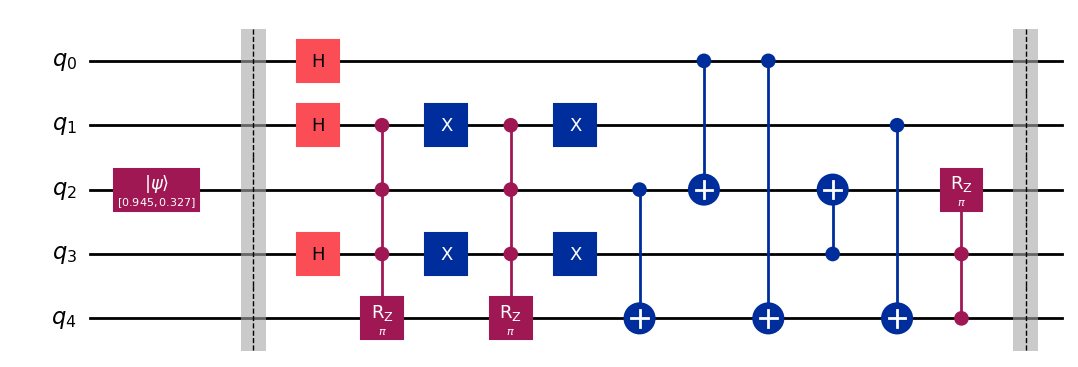

In [356]:
n = 3
qc = QuantumCircuit(5)

theta = np.arctan(np.sqrt((np.sqrt(5) - 1) / 2))
amp0 = np.cos(theta/2)
amp1 = np.sin(theta/2)

qc.initialize([amp0, amp1], 2)
qc.barrier()
qc.h(0)
qc.h(1)
qc.h(3)

qc.append(cntrol3_pi, [1, 2, 3, 4])

qc.x(1)
qc.x(3)
qc.append(cntrol3_pi, [1, 2, 3, 4])
qc.x(1)
qc.x(3)

qc.cx(2, 4)
qc.cx(0, 2)
qc.cx(0, 4)
qc.cx(3, 2)

qc.cx(1, 4)
qc.append(cntrol2_pi, [4, 3, 2])
qc.barrier()

display(qc.draw(output='mpl'))

In [363]:
state = Statevector.from_instruction(qc)
display(state.draw("latex"))
print(state)

<IPython.core.display.Latex object>

Statevector([ 3.34117436e-01-4.16333634e-17j,
             -6.93889390e-18-1.15609424e-01j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              1.15609424e-01+6.93889390e-18j,
              3.34117436e-01+1.38777878e-17j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00-1.15609424e-01j,
              3.34117436e-01-4.16333634e-17j,
              3.34117436e-01+4.16333634e-17j,
              1.15609424e-01+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              3.34117436e-01-1.38777878e-17j,
              1.15609424e-01+0.00000000e+00j,
              0.00000000e+00-1.15609424e-01j,
              3.34117436e-01-1.387

In [364]:
print(amp0/(2*np.sqrt(2)))
print(amp1/(2*np.sqrt(2)))

0.33411743610568867
0.11560942388127812


In [365]:
ideal = Statevector([ 3.34117436e-01-4.16333634e-17j,
             -6.93889390e-18-1.15609424e-01j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              1.15609424e-01+6.93889390e-18j,
              3.34117436e-01+1.38777878e-17j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00-1.15609424e-01j,
              3.34117436e-01-4.16333634e-17j,
              3.34117436e-01+4.16333634e-17j,
              1.15609424e-01+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              3.34117436e-01-1.38777878e-17j,
              1.15609424e-01+0.00000000e+00j,
              0.00000000e+00-1.15609424e-01j,
              3.34117436e-01-1.38777878e-17j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00-1.15609424e-01j,
              1.38777878e-17-3.34117436e-01j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              1.38777878e-17+3.34117436e-01j,
              1.15609424e-01+0.00000000e+00j],
            dims=(2, 2, 2, 2, 2))

# Fault-Tolerant QEC Circuit

### Measuring XZZXI:

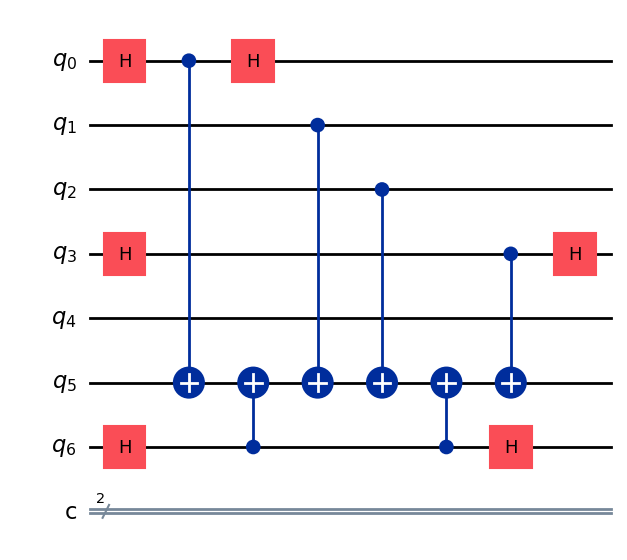

In [392]:
# Last two qubits are syndrome and flag qubits
QEC_circ1 = QuantumCircuit(7,2)

# Last qubit is initialized to be |+>
QEC_circ1.h(6)

QEC_circ1.h(0)
QEC_circ1.cx(0, 5)
QEC_circ1.h(0)

QEC_circ1.cx(6, 5)

QEC_circ1.cx(1, 5)
QEC_circ1.cx(2, 5)

QEC_circ1.cx(6, 5)

QEC_circ1.h(3)
QEC_circ1.cx(3, 5)
QEC_circ1.h(3)

# To measure the last qubit in the X basis
QEC_circ1.h(6)

display(QEC_circ1.draw(output='mpl'))

In [ ]:
meas_circuit1 = QEC_circ1.copy()
meas_circuit1.measure([5, 6], [0, 1])

### Measuring IXZZX:

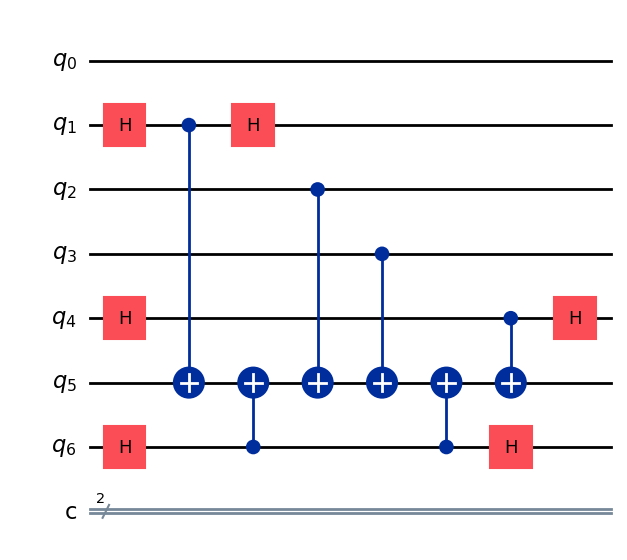

In [393]:
# Last two qubits are syndrome and flag qubits
QEC_circ2 = QuantumCircuit(7,2)

# Last qubit is initialized to be |+>
QEC_circ2.h(6)

QEC_circ2.h(1)
QEC_circ2.cx(1, 5)
QEC_circ2.h(1)

QEC_circ2.cx(6, 5)

QEC_circ2.cx(2, 5)
QEC_circ2.cx(3, 5)

QEC_circ2.cx(6, 5)

QEC_circ2.h(4)
QEC_circ2.cx(4, 5)
QEC_circ2.h(4)

# To measure the last qubit in the X basis
QEC_circ2.h(6)

display(QEC_circ2.draw(output='mpl'))

In [ ]:
meas_circuit2 = QEC_circ2.copy()
meas_circuit2.measure([5, 6], [0, 1])

### Measuring XIXZZ:

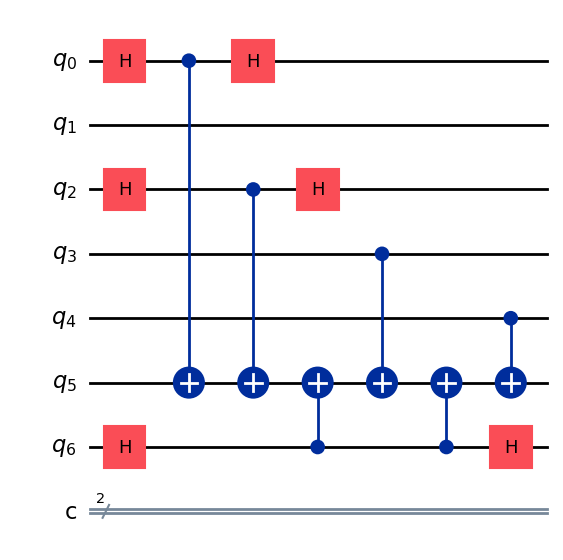

In [394]:
# Last two qubits are syndrome and flag qubits
QEC_circ3 = QuantumCircuit(7,2)

# Last qubit is initialized to be |+>
QEC_circ3.h(6)

QEC_circ3.h(0)
QEC_circ3.cx(0, 5)
QEC_circ3.h(0)

QEC_circ3.h(2)
QEC_circ3.cx(2, 5)
QEC_circ3.h(2)

QEC_circ3.cx(6, 5)

QEC_circ3.cx(3, 5)

QEC_circ3.cx(6, 5)

QEC_circ3.cx(4, 5)

# To measure the last qubit in the X basis
QEC_circ3.h(6)

display(QEC_circ3.draw(output='mpl'))

In [ ]:
meas_circuit3 = QEC_circ3.copy()
meas_circuit3.measure([5, 6], [0, 1])

### Measuring ZXIXZ:

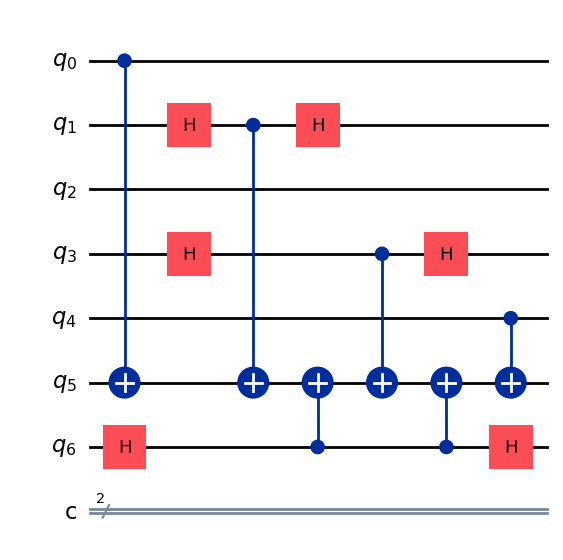

In [395]:
# Last two qubits are syndrome and flag qubits
QEC_circ4 = QuantumCircuit(7,2)

# Last qubit is initialized to be |+>
QEC_circ4.h(6)

QEC_circ4.cx(0, 5)

QEC_circ4.h(1)
QEC_circ4.cx(1, 5)
QEC_circ4.h(1)

QEC_circ4.cx(6, 5)

QEC_circ4.h(3)
QEC_circ4.cx(3, 5)
QEC_circ4.h(3)

QEC_circ4.cx(6, 5)

QEC_circ4.cx(4, 5)

# To measure the last qubit in the X basis
QEC_circ4.h(6)

display(QEC_circ4.draw(output='mpl'))

In [ ]:
meas_circuit4 = QEC_circ4.copy()
meas_circuit4.measure([5, 6], [0, 1])

# Implementing Logical Hadamard

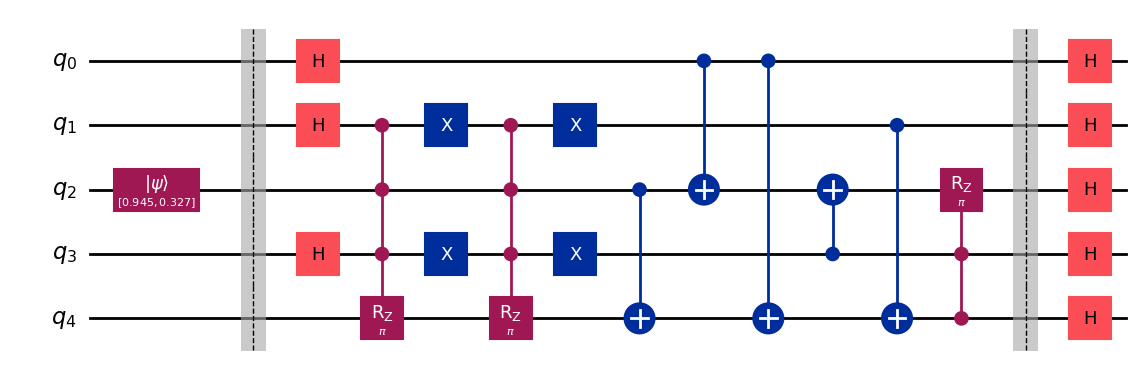

In [366]:
circ_copy = qc.copy()
for i in range(5):
    circ_copy.h(i)

display(circ_copy.draw(output='mpl'))

### Need to relabel qubit lines

# Implementing Logical CZ

### First Piece:

In [386]:
Kmat = SGate().to_matrix() @ HGate().to_matrix()
K = UnitaryGate(Kmat, label='K')

Kdag_mat = HGate().inverse().to_matrix() @ SGate().inverse().to_matrix()
K_dag = UnitaryGate(Kdag_mat, label='K_dag')

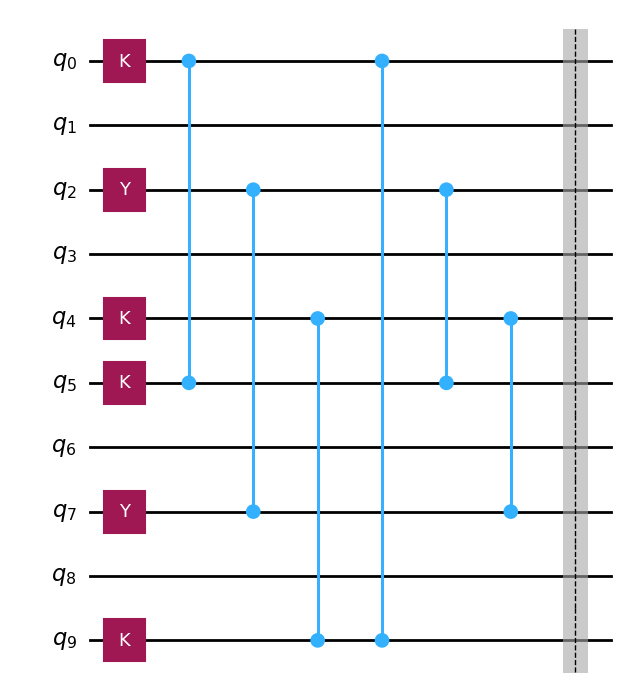

In [382]:
CZ1 = QuantumCircuit(10)

CZ1.append(K, [0])
CZ1.append(K, [4])
CZ1.append(K, [5])
CZ1.append(K, [9])
CZ1.y(2)
CZ1.y(7)

CZ1.cz(0, 5)
CZ1.cz(2, 7)
CZ1.cz(4, 9)
CZ1.cz(0, 9)
CZ1.cz(2, 5)
CZ1.cz(4, 7)
CZ1.barrier()

display(CZ1.draw(output='mpl'))

### Second Piece: A block of EC

### Third Piece: 

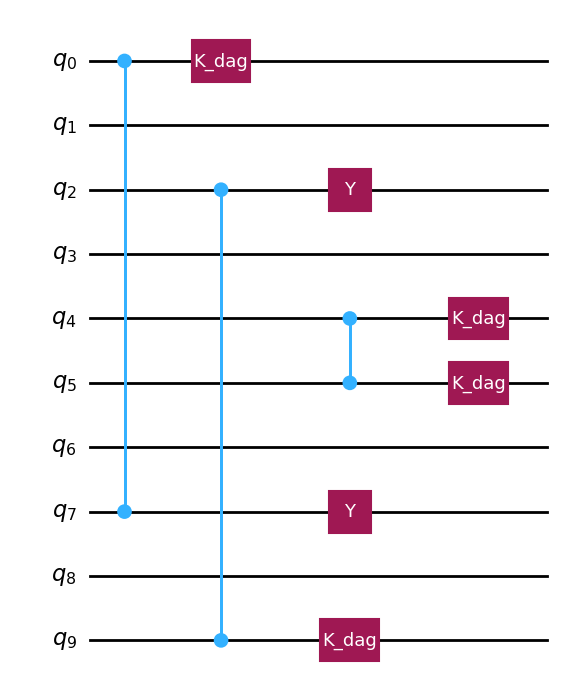

In [387]:
CZ2 = QuantumCircuit(10)

CZ2.cz(0, 7)
CZ2.cz(2, 9)
CZ2.cz(4, 5)

CZ2.append(K_dag, [0])
CZ2.append(K_dag, [4])
CZ2.append(K_dag, [5])
CZ2.append(K_dag, [9])
CZ2.y(2)
CZ2.y(7)

display(CZ2.draw(output='mpl'))